In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings

# Hides warning
warnings.filterwarnings('ignore') 
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style

%matplotlib inline
np.random.seed(7) # seeding random number generator

In [2]:
# Loading Data

# Load 1429_1.csv
df = pd.read_csv("../data/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

In [4]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,2.900000e+01,5000.000000,5000.000000
mean,1.858740e+08,0.312400,4.596800
std,2.084040e+07,3.111582,0.731804
min,1.082112e+08,0.000000,1.000000
25%,1.851185e+08,0.000000,4.000000
50%,1.880757e+08,0.000000,5.000000
75%,1.981949e+08,0.000000,5.000000
max,2.027812e+08,105.000000,5.000000


In [5]:
# Find unique products based on 'name'
print("Total product names : {}".format( df['name'].count() ))
print("Total unique product names : {}\n".format( np.count_nonzero(df['name'].unique()) ))

print("Total product ASINs : {}".format( df['asins'].count() ))
print("Total unique product ASINs : {}".format( np.count_nonzero(df['asins'].unique()) ))

Total product names : 5000
Total unique product names : 23

Total product ASINs : 5000
Total unique product ASINs : 24


In [6]:
# We can see that there are a certain no of products based on unique 'name'


In [7]:
# Viewing the unique product 'name's

product_names = df['name'].unique()

print("product_names : {}".format((product_names)[:10])) # Show first 10 product_names

product_names : ['Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)'
 'Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen'
 'Amazon Fire TV with 4K Ultra HD and Alexa Voice Remote (Pendant Design) | Streaming Media Player'
 'Amazon - Echo Plus w/ Built-In Hub - Silver'
 'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders'
 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case'
 'Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers'
 'Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black'
 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case'
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Blue']


In [8]:
# Viewing the unique product 'asin's

product_ASINs = df['asins'].unique()

print("product_ASINs : {}".format(list(product_ASINs))) # Show all product_ASINS

product_ASINs : ['B00ZV9PXP2', 'B010CEHQTG', 'B01J24C0TI', 'B01N32NCPM', 'B06XB29FPF', 'B00QFQRELG', 'B018Y22C2Y', 'B017JG41PC', 'B018Y22BI4', 'B018Y23MNM', 'B01AHBBG04', 'B01AHBDCKQ', 'B01BH83OOM', 'B0189XYY0Q', 'B00VINDBJK', 'B00IOY8XWQ', 'B01AHB9CN2', 'B018Y225IA', 'B00IOYAM4I', 'B01AHB9C1E', 'B00REQKWGA', 'B01ACEKAJY', 'B01AHB9CYG', 'B018Y224PY']


In [9]:
# View the product names of a random ASIN

random_ASIN = 1
df[ df['asins'] == product_ASINs[random_ASIN] ]

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
96,AWFUWc8THh53nbDRF6YO,2018-02-02T02:30:22Z,2018-10-15T16:03:30Z,Amazon Echo Show Alexa-enabled Bluetooth Speak...,B010CEHQTG,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",https://static.bhphoto.com/images/images500x50...,"echoshowwhite/ameshowwht,amazon/b010cehqtg,848...",...,2018-04-26T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5875664/revie...,Great Gift for anyone. Very easy to setup. Coe...,Amazon Echo Show - Greatest Gift EVER,doyson,https://reviews.bestbuy.com/3545/5875664/revie...
97,AWFUWc8THh53nbDRF6YO,2018-02-02T02:30:22Z,2018-10-15T16:03:30Z,Amazon Echo Show Alexa-enabled Bluetooth Speak...,B010CEHQTG,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",https://static.bhphoto.com/images/images500x50...,"echoshowwhite/ameshowwht,amazon/b010cehqtg,848...",...,2018-04-26T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5875664/revie...,Super excited to give this as a gift. It's sup...,Amazon Echo Show,BBReview,https://reviews.bestbuy.com/3545/5875664/revie...
98,AWFUWc8THh53nbDRF6YO,2018-02-02T02:30:22Z,2018-10-15T16:03:30Z,Amazon Echo Show Alexa-enabled Bluetooth Speak...,B010CEHQTG,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",https://static.bhphoto.com/images/images500x50...,"echoshowwhite/ameshowwht,amazon/b010cehqtg,848...",...,2018-04-26T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5875664/revie...,"We bought this for mother in law, buying anoth...",Had to upgrade,Christi,https://reviews.bestbuy.com/3545/5875664/revie...
99,AWFUWc8THh53nbDRF6YO,2018-02-02T02:30:22Z,2018-10-15T16:03:30Z,Amazon Echo Show Alexa-enabled Bluetooth Speak...,B010CEHQTG,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",https://static.bhphoto.com/images/images500x50...,"echoshowwhite/ameshowwht,amazon/b010cehqtg,848...",...,2018-04-26T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5875664/revie...,"Well designed, good sound, has everything Alex...","Practical, easy to setup",ConsistentBuyer,https://reviews.bestbuy.com/3545/5875664/revie...
100,AWFUWc8THh53nbDRF6YO,2018-02-02T02:30:22Z,2018-10-15T16:03:30Z,Amazon Echo Show Alexa-enabled Bluetooth Speak...,B010CEHQTG,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",https://static.bhphoto.com/images/images500x50...,"echoshowwhite/ameshowwht,amazon/b010cehqtg,848...",...,2018-04-26T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5875664/revie...,I have one Alexa and three Echo dots and havin...,Awesome having Show!,Ciro,https://reviews.bestbuy.com/3545/5875664/revie...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,AWFUWc8THh53nbDRF6YO,2018-02-02T02:30:22Z,2018-10-15T16:03:30Z,Amazon Echo Show Alexa-enabled Bluetooth Speak...,B010CEHQTG,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",https://static.bhphoto.com/images/images500x50...,"echoshowwhite/ameshowwht,amazon/b010cehqtg,848...",...,2018-04-26T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5875664/revie...,Love the Echo Show. Allows me to control light...,Great device,Jags,https://reviews.bestbuy.com/3545/5875664/revie...
742,AWFUWc8THh53nbDRF6YO,2018-02-02T02:30:22Z,2018-10-15T16:03:30Z,Amazon Echo Show Alexa-enabled Bluetooth Speak...,B010CEHQTG,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",https://static.bhphoto.com/images/images500x50...,"echoshowwhite/ameshowwht,amazon/b010cehqtg,848...",...,2018-04-26T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5875664/revie...,We're still learning all the things this devic...,Great for listening to music,Aunt,

In [10]:
# ASIN is unique for similar products. We shall use ASIN to differentiate the product catagories

In [11]:
# View names of all products by grouping by product_ASINS.
 
print("ASIN \t\t\t Instances in group  \t Product name")
print('-'*80)

for group, frame in df.groupby(['asins']):
    name_list = list(frame['name'])
    name_list = list(map(str, name_list))
    name_list = [x for x in name_list if x!='nan']
    if len(name_list)>0:
        print("{} \t\t {} \t\t\t {} ".format(group , len(name_list),  name_list[0].split(',')[0][:30]))

ASIN 			 Instances in group  	 Product name
--------------------------------------------------------------------------------
B00IOY8XWQ 		 82 			 Amazon - Kindle Voyage - 6" -  
B00IOYAM4I 		 22 			 Amazon - Kindle Voyage - 4GB - 
B00QFQRELG 		 22 			 Amazon 9W PowerFast Official O 
B00REQKWGA 		 39 			 Kindle Oasis E-reader with Lea 
B00VINDBJK 		 24 			 Kindle Oasis E-reader with Lea 
B00ZV9PXP2 		 96 			 Amazon Kindle E-Reader 6" Wifi 
B010CEHQTG 		 650 			 Amazon Echo Show Alexa-enabled 
B017JG41PC 		 159 			 Kindle E-reader - White 
B0189XYY0Q 		 106 			 Fire HD 10 Tablet 
B018Y224PY 		 101 			 Fire Tablet with Alexa 
B018Y225IA 		 467 			 Brand New Amazon Kindle Fire 1 
B018Y22BI4 		 371 			 Fire Tablet 
B018Y22C2Y 		 561 			 Fire Kids Edition Tablet 
B018Y23MNM 		 217 			 Fire Kids Edition Tablet 
B01ACEKAJY 		 58 			 All-New Fire HD 8 Tablet 
B01AHB9C1E 		 53 			 Fire HD 8 Tablet with Alexa 
B01AHB9CN2 		 797 			 All-New Fire HD 8 Tablet 
B01AHB9CYG 		 40 			 All-New Fire HD 8 

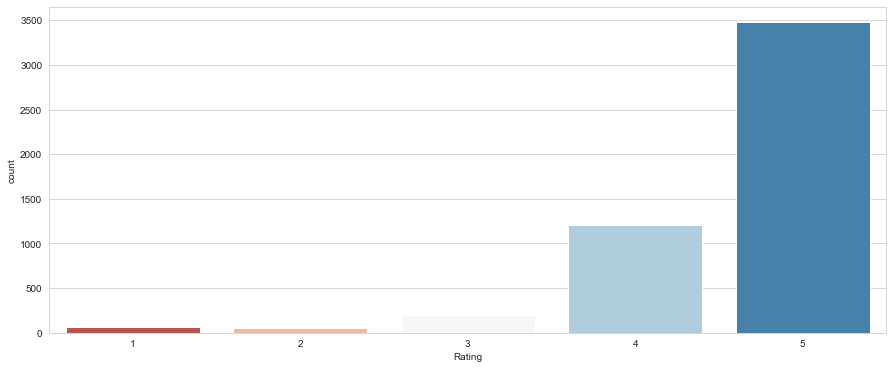

In [12]:
# Show distribution of review ratings

plt.figure(figsize=(15,6))
sns.countplot(x='reviews.rating', data=df, palette='RdBu')
plt.xlabel('Rating')
plt.show()

In [13]:
# Most ratings are of score 4 and 5

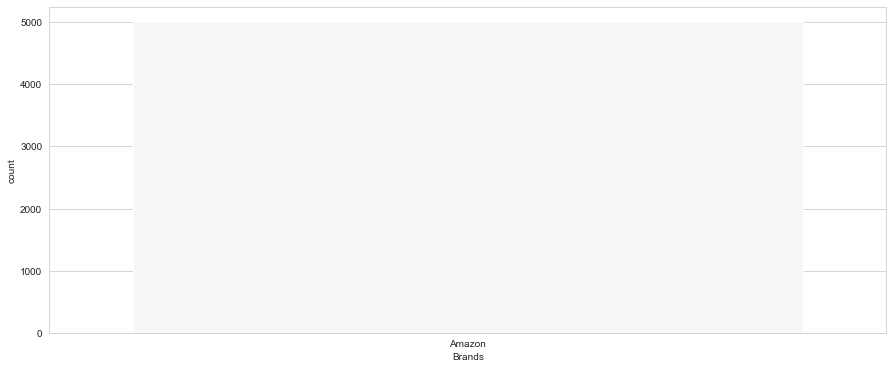

In [15]:
# Show distribution of Brand

plt.figure(figsize=(15,6))
sns.countplot(x='brand', data=df, palette='RdBu')
plt.xlabel('Brands')
plt.show()

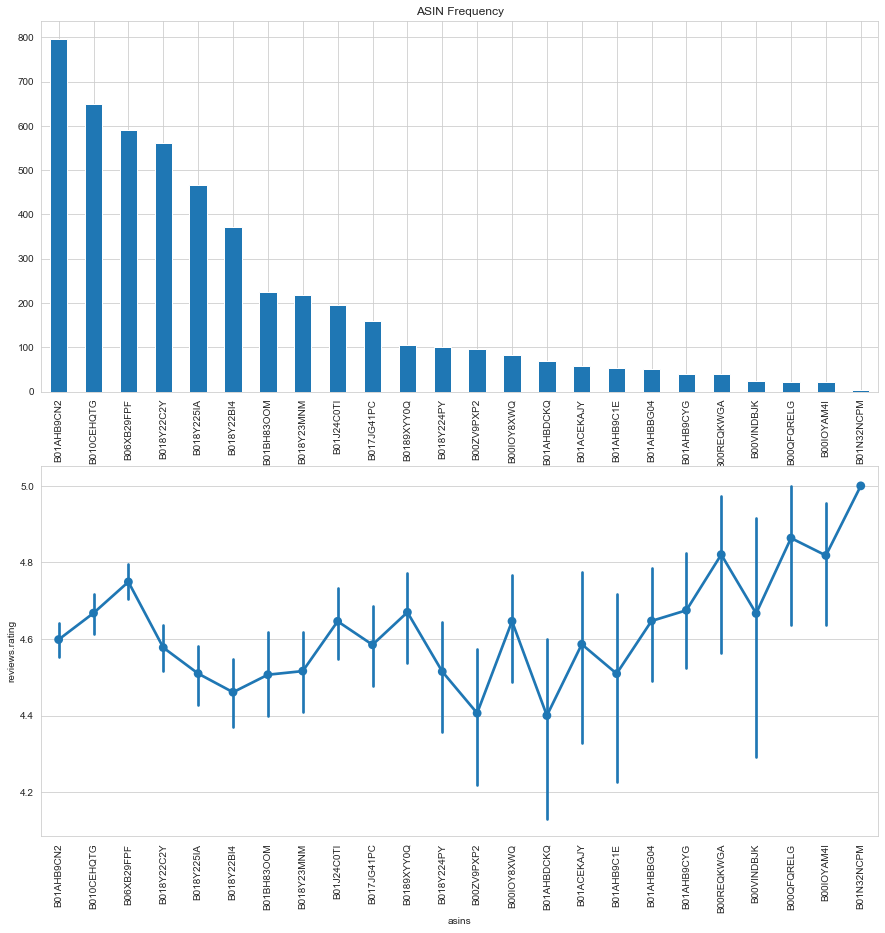

In [16]:
# Visualizing review rating per ASIN 
# Bar plot shows no. of reviews
# Point plot shows the rating and variance in the rating

asins_count_ix = df["asins"].value_counts().index
plt.subplots(2,1,figsize=(15,15))

plt.subplot(2,1,1)
df["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")

plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=df)

plt.xticks(rotation=90)
plt.show()

# Products with many reviews have rating with low variance 
# Products with few reviews have rating with high variance

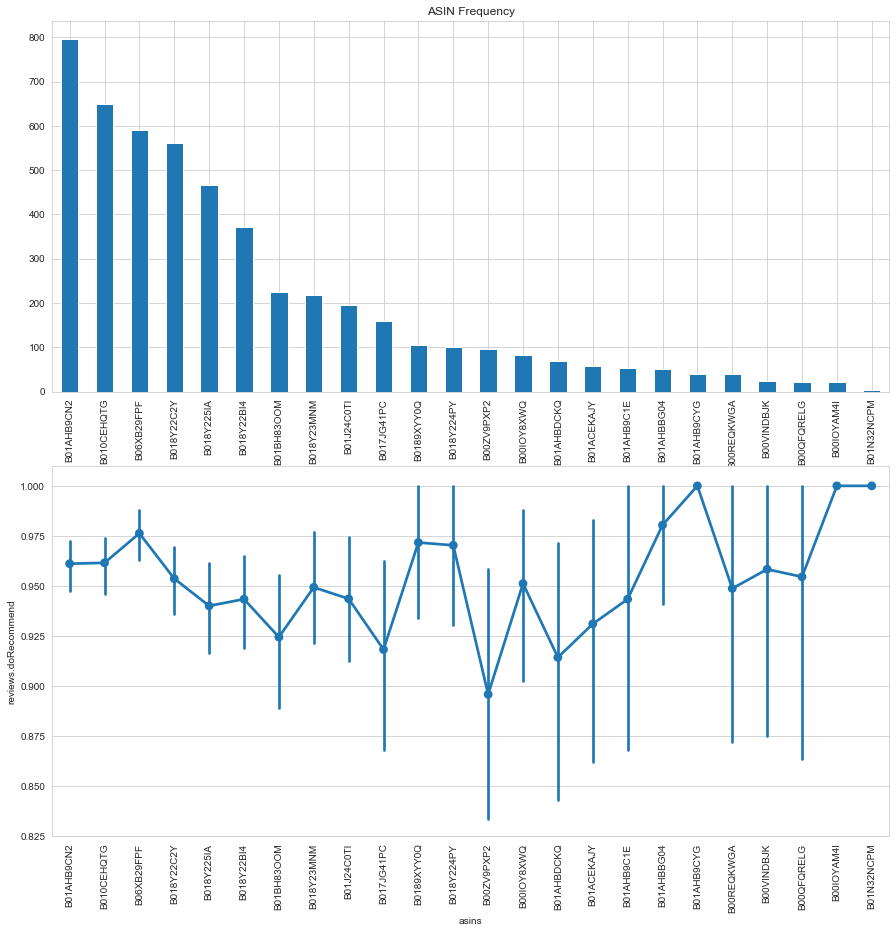

In [17]:
# Visualizing review doRecommend per ASIN 
# Bar plot shows no. of reviews
# Point plot shows the rating and variance in the rating

asins_count_ix = df["asins"].value_counts().index
plt.subplots(2,1,figsize=(15,15))

plt.subplot(2,1,1)
df["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")

plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.doRecommend", order=asins_count_ix, data=df)

plt.xticks(rotation=90)
plt.show()